In [1]:
import pandas as pd
from windowing import GeneData
pd.set_option('display.max_columns', 500)

data = pd.read_csv('data/22-23/player_data.csv')
data = data[data['minutes'] > 0].reset_index(drop=True)
gene = GeneData(data)

gene.reset_data()
gene.add_team_performance()
gene.position_filter('MID')
gene.window_split()
gene.scale_data()
gene.wrangle_data()

  0%|          | 0/3129 [00:00<?, ?it/s]

  0%|          | 0/894 [00:00<?, ?it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

In [2]:
from keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Activation, BatchNormalization, MaxPooling1D, Flatten, Dropout, Dense, concatenate

Tabular Model

In [3]:
match_data_dim = gene.train_data['match_data'].shape[1]


tab_input = Input(shape=(4,))
tab_dense_1 = Dense(8, input_dim=match_data_dim, activation="relu")(tab_input)
tab_model = Dense(4, activation="relu")(tab_dense_1)


# model.add(Dense(1, activation="linear"))

# model.compile(loss='mean_squared_error', optimizer='adam')

Window Model

In [4]:
player_data_shape = gene.train_data['player_data'].shape[1:3]

window_input = Input(shape=(3, 34))

player_data_shape
conv1 = Conv1D(filters=32, kernel_size=2, activation='relu')(window_input)
pool1 = MaxPooling1D(pool_size=2)(conv1)

conv2 = Conv1D(filters=16, kernel_size=1, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=1)(conv2)

flat = Flatten()(pool2)
window_model = Dense(10, activation='relu')(flat)
# output = Dense(1, activation="linear")(hidden1)

# model = Model(inputs=visible, outputs=output)
# model.compile(loss='mean_squared_error', optimizer='adam')

In [5]:
trainX_p = gene.train_data['player_data']
trainX_m = gene.train_data['match_data']

trainy = gene.train_data['target_data']

testX_p = gene.test_data['player_data']
testX_m = gene.test_data['match_data']

testy = gene.test_data['target_data']

#Merging model A and B
a_b = concatenate([tab_model,window_model],name="concatenated_layer")

#Final Layer
output_layer = Dense(1, activation="linear", name = "output_layer")(a_b)


#Model Definition 
model = Model(inputs=[tab_input, window_input],outputs=[output_layer])
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
model.fit([trainX_m, trainX_p], trainy, epochs=100, batch_size=500, verbose=1)



Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.0704
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 13/100
7/7 [==============================] - 0s 3ms/st

In [6]:
accuracy = model.evaluate([testX_m, testX_p], testy, batch_size=500, verbose=1)

accuracy

1/1 [==============================] - 0s 125ms/step - loss: 0.0150


0.015018679201602936

In [17]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(testy, preds, squared=True))

mean_squared_error(testy,np.roll(testy, 1), squared=True)

mean_squared_error(testy,np.ones(len(testy))*0.2125388198757764, squared=True)

0.015018680163537043


0.01606138453136453

14/14 [==============================] - 0s 999us/step


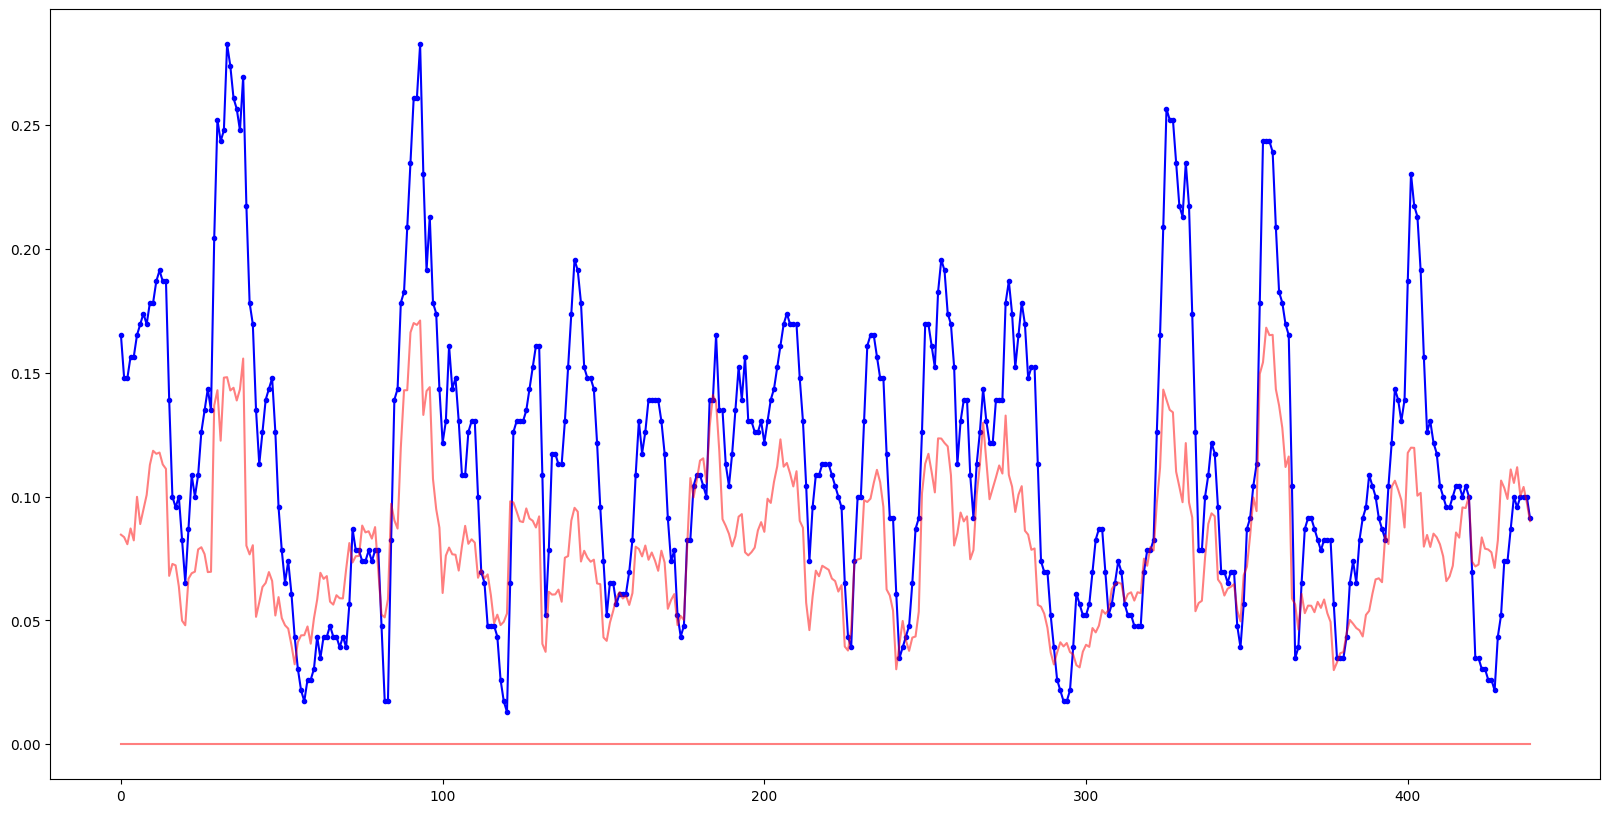

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(a, n=10) :
    ret = np.cumsum(np.abs(a), dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

preds = np.transpose(model.predict([testX_m, testX_p]))[0]
plt.figure(figsize=(20,10))

plt.plot(moving_average(np.roll(testy, 1)-testy), 'b', marker='.')
plt.plot(moving_average(preds-testy), 'r', alpha=0.5)
plt.plot(moving_average(testy-testy), 'r', alpha=0.5)

# plt.plot(moving_average(np.roll(testy, 1)), 'b', marker='.')
# plt.plot(moving_average(preds), 'g', alpha=0.5)
# plt.plot(moving_average(testy), 'r', alpha=0.5)

In [21]:
import numpy as np





14/14 [==============================] - 0s 1ms/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(filters=28, kernel_size=2, activation='relu', input_shape=(window_size, 28)))
model.add(layers.Conv1D(filters=28, kernel_size=2, activation='relu'))

model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=200, verbose=0)
preds = np.transpose(model.predict(X_test))[0]

Multilayer Perceptron

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

Convolutional Neural Network

In [13]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

In [ ]:
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# define the model input
	inputs = Input(shape=inputShape)
	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs
		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
		

        	# flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)
	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = Dense(4)(x)
	x = Activation("relu")(x)
	# check to see if the regression node should be added
	if regress:
		x = Dense(1, activation="linear")(x)
	# construct the CNN
	model = Model(inputs, x)
	# return the CNN
	return model